# Module Import & 환경 Setting

In [1]:
import random
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import os
import warnings

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# 경고 문구 무시
warnings.filterwarnings(action='ignore') 

In [3]:
# 그래프 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
# Seed 고정
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

# Dataset Load

In [5]:
train_df = pd.read_csv('./dataset/train.csv', encoding='utf-8')
train_df.info()
train_df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
5,1_20220601 05,1,20220601 05,17.2,NaN,2.1,46.0,NaN,NaN,1087.20
6,1_20220601 06,1,20220601 06,16.3,NaN,1.0,50.0,0.0,0.05,1314.72
7,1_20220601 07,1,20220601 07,17.4,NaN,1.3,50.0,1.0,0.55,1684.80
8,1_20220601 08,1,20220601 08,20.6,NaN,1.8,44.0,1.0,1.29,1976.16
9,1_20220601 09,1,20220601 09,23.2,NaN,1.7,41.0,1.0,2.01,2289.12


In [6]:
test_df = pd.read_csv('./dataset/test.csv', encoding='utf-8')
test_df.info()
test_df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(C)          16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 918.9+ KB


,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77
5,1_20220825 05,1,20220825 05,21.6,0.0,1.6,81
6,1_20220825 06,1,20220825 06,21.5,0.0,2.3,84
7,1_20220825 07,1,20220825 07,21.7,0.0,1.4,83
8,1_20220825 08,1,20220825 08,22.3,0.0,2.2,82
9,1_20220825 09,1,20220825 09,22.7,0.0,2.4,78


In [7]:
building_df = pd.read_csv('./dataset/building_info.csv', encoding='utf-8')
building_df.info()
building_df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   건물번호          100 non-null    int64  
 1   건물유형          100 non-null    object 
 2   연면적(m2)       100 non-null    float64
 3   냉방면적(m2)      100 non-null    float64
 4   태양광용량(kW)     100 non-null    object 
 5   ESS저장용량(kWh)  100 non-null    object 
 6   PCS용량(kW)     100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000
5,6,건물기타,205754.00,74565.00,-,-,-
6,7,건물기타,101711.52,41341.10,-,800,300
7,8,건물기타,75344.54,24117.00,-,-,-
8,9,건물기타,222882.35,15651.18,-,-,-
9,10,건물기타,31062.00,18637.00,-,-,-


# Data Preprocessing

## Train data

In [8]:
# 일조, 일사 컬럼 삭제(test data에서 변수로 활용되지 않음)
train_df = train_df.drop(['일조(hr)', '일사(MJ/m2)'], axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.5+ MB


In [9]:
# 결측치 확인
train_df.isna().sum()

num_date_time         0
건물번호                  0
일시                    0
기온(C)                 0
강수량(mm)          160069
풍속(m/s)              19
습도(%)                 9
전력소비량(kWh)            0
dtype: int64

In [10]:
# 강수량 결측치 0으로 처리
train_df['강수량(mm)'].fillna(0.0, inplace=True)

# 풍속, 습도 결측치 평균으로 채우고 반올림하기
train_df['풍속(m/s)'].fillna(round(train_df['풍속(m/s)'].mean(),1), inplace=True)
train_df['습도(%)'].fillna(round(train_df['습도(%)'].mean(),1), inplace=True)

train_df.head(20)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,0.0,0.9,42.0,1085.28
1,1_20220601 01,1,20220601 01,18.0,0.0,1.1,45.0,1047.36
2,1_20220601 02,1,20220601 02,17.7,0.0,1.5,45.0,974.88
3,1_20220601 03,1,20220601 03,16.7,0.0,1.4,48.0,953.76
4,1_20220601 04,1,20220601 04,18.4,0.0,2.8,43.0,986.40
5,1_20220601 05,1,20220601 05,17.2,0.0,2.1,46.0,1087.20
6,1_20220601 06,1,20220601 06,16.3,0.0,1.0,50.0,1314.72
7,1_20220601 07,1,20220601 07,17.4,0.0,1.3,50.0,1684.80
8,1_20220601 08,1,20220601 08,20.6,0.0,1.8,44.0,1976.16
9,1_20220601 09,1,20220601 09,23.2,0.0,1.7,41.0,2289.12


In [11]:
# 월, 일, 시간 컬럼 추가
train_df['month'] = train_df['일시'].apply(lambda x : float(x[4:6]))
train_df['day'] = train_df['일시'].apply(lambda x : float(x[6:8]))
train_df['time'] = train_df['일시'].apply(lambda x : float(x[9:11]))
train_df.head(20)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),month,day,time
0,1_20220601 00,1,20220601 00,18.6,0.0,0.9,42.0,1085.28,6.0,1.0,0.0
1,1_20220601 01,1,20220601 01,18.0,0.0,1.1,45.0,1047.36,6.0,1.0,1.0
2,1_20220601 02,1,20220601 02,17.7,0.0,1.5,45.0,974.88,6.0,1.0,2.0
3,1_20220601 03,1,20220601 03,16.7,0.0,1.4,48.0,953.76,6.0,1.0,3.0
4,1_20220601 04,1,20220601 04,18.4,0.0,2.8,43.0,986.40,6.0,1.0,4.0
5,1_20220601 05,1,20220601 05,17.2,0.0,2.1,46.0,1087.20,6.0,1.0,5.0
6,1_20220601 06,1,20220601 06,16.3,0.0,1.0,50.0,1314.72,6.0,1.0,6.0
7,1_20220601 07,1,20220601 07,17.4,0.0,1.3,50.0,1684.80,6.0,1.0,7.0
8,1_20220601 08,1,20220601 08,20.6,0.0,1.8,44.0,1976.16,6.0,1.0,8.0
9,1_20220601 09,1,20220601 09,23.2,0.0,1.7,41.0,2289.12,6.0,1.0,9.0


In [12]:
# '일시' column 날짜형 변수로 형변환
train_df['일시'] = pd.to_datetime(train_df['일시'], format='%Y%m%d %H')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num_date_time  204000 non-null  object        
 1   건물번호           204000 non-null  int64         
 2   일시             204000 non-null  datetime64[ns]
 3   기온(C)          204000 non-null  float64       
 4   강수량(mm)        204000 non-null  float64       
 5   풍속(m/s)        204000 non-null  float64       
 6   습도(%)          204000 non-null  float64       
 7   전력소비량(kWh)     204000 non-null  float64       
 8   month          204000 non-null  float64       
 9   day            204000 non-null  float64       
 10  time           204000 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 17.1+ MB


In [34]:
# 요일 변수 생성

# 날짜별 요일 변수 생성 0~6
day_num = [i.weekday() for i in train_df['일시']]

# 숫자 -> 실제 요일로 치환
days = ['월', '화', '수', '목', '금', '토', '일']
day_name = [days[i] for i in day_num]

In [37]:
# 주말여부 변수 생성
is_weekend =[]
for num in day_num:
    if num >= 5:
        is_weekend.append(1)
    else:
        is_weekend.append(0)

In [39]:
train_df['요일'] = day_name
train_df['주말여부'] = is_weekend

In [44]:
train_df[100:150]

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),month,day,time,요일,주말여부
100,1_20220605 04,1,2022-06-05 04:00:00,23.3,0.0,1.8,60.0,807.36,6.0,5.0,4.0,일,1
101,1_20220605 05,1,2022-06-05 05:00:00,23.1,0.0,2.3,59.0,914.88,6.0,5.0,5.0,일,1
102,1_20220605 06,1,2022-06-05 06:00:00,22.8,0.0,1.7,59.0,1071.84,6.0,5.0,6.0,일,1
103,1_20220605 07,1,2022-06-05 07:00:00,22.8,0.0,2.8,57.0,1236.00,6.0,5.0,7.0,일,1
104,1_20220605 08,1,2022-06-05 08:00:00,22.9,0.0,1.3,55.0,1440.48,6.0,5.0,8.0,일,1
105,1_20220605 09,1,2022-06-05 09:00:00,23.6,0.0,1.2,53.0,1814.40,6.0,5.0,9.0,일,1
106,1_20220605 10,1,2022-06-05 10:00:00,24.7,0.0,2.0,49.0,2085.60,6.0,5.0,10.0,일,1
107,1_20220605 11,1,2022-06-05 11:00:00,26.4,0.0,1.9,45.0,2493.60,6.0,5.0,11.0,일,1
108,1_20220605 12,1,2022-06-05 12:00:00,26.2,0.0,3.8,46.0,2582.40,6.0,5.0,12.0,일,1
109,1_20220605 13,1,2022-06-05 13:00:00,24.8,0.0,3.7,50.0,2605.44,6.0,5.0,13.0,일,1


## Test data

In [45]:
# 결측치 확인
test_df.isna().sum()

num_date_time    0
건물번호             0
일시               0
기온(C)            0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
dtype: int64

In [46]:
# 월, 일, 시간 컬럼 추가
test_df['month'] = test_df['일시'].apply(lambda x : float(x[4:6]))
test_df['day'] = test_df['일시'].apply(lambda x : float(x[6:8]))
test_df['time'] = test_df['일시'].apply(lambda x : float(x[9:11]))
test_df.head(20)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),month,day,time
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72,8.0,25.0,0.0
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72,8.0,25.0,1.0
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75,8.0,25.0,2.0
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78,8.0,25.0,3.0
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77,8.0,25.0,4.0
5,1_20220825 05,1,20220825 05,21.6,0.0,1.6,81,8.0,25.0,5.0
6,1_20220825 06,1,20220825 06,21.5,0.0,2.3,84,8.0,25.0,6.0
7,1_20220825 07,1,20220825 07,21.7,0.0,1.4,83,8.0,25.0,7.0
8,1_20220825 08,1,20220825 08,22.3,0.0,2.2,82,8.0,25.0,8.0
9,1_20220825 09,1,20220825 09,22.7,0.0,2.4,78,8.0,25.0,9.0


In [47]:
# '일시' column 날짜형 변수로 형변환
test_df['일시'] = pd.to_datetime(test_df['일시'], format='%Y%m%d %H')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   num_date_time  16800 non-null  object        
 1   건물번호           16800 non-null  int64         
 2   일시             16800 non-null  datetime64[ns]
 3   기온(C)          16800 non-null  float64       
 4   강수량(mm)        16800 non-null  float64       
 5   풍속(m/s)        16800 non-null  float64       
 6   습도(%)          16800 non-null  int64         
 7   month          16800 non-null  float64       
 8   day            16800 non-null  float64       
 9   time           16800 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 1.3+ MB


In [48]:
# 요일 변수 생성

# 날짜별 요일 변수 생성 0~6
day_num_test = [i.weekday() for i in test_df['일시']]

# 숫자 -> 실제 요일로 치환
days = ['월', '화', '수', '목', '금', '토', '일']
day_name_test = [days[i] for i in day_num_test]

In [49]:
# 주말여부 변수 생성
is_weekend_test =[]
for num in day_num_test:
    if num >= 5:
        is_weekend_test.append(1)
    else:
        is_weekend_test.append(0)

In [50]:
test_df['요일'] = day_name_test
test_df['주말여부'] = is_weekend_test

In [52]:
test_df[50:100]

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),month,day,time,요일,주말여부
50,1_20220827 02,1,2022-08-27 02:00:00,21.0,15.6,5.4,88,8.0,27.0,2.0,토,1
51,1_20220827 03,1,2022-08-27 03:00:00,20.7,2.0,2.7,91,8.0,27.0,3.0,토,1
52,1_20220827 04,1,2022-08-27 04:00:00,19.4,0.0,3.2,85,8.0,27.0,4.0,토,1
53,1_20220827 05,1,2022-08-27 05:00:00,18.9,0.0,0.6,84,8.0,27.0,5.0,토,1
54,1_20220827 06,1,2022-08-27 06:00:00,18.1,0.0,2.1,82,8.0,27.0,6.0,토,1
55,1_20220827 07,1,2022-08-27 07:00:00,17.7,0.0,1.9,85,8.0,27.0,7.0,토,1
56,1_20220827 08,1,2022-08-27 08:00:00,18.3,0.0,2.1,77,8.0,27.0,8.0,토,1
57,1_20220827 09,1,2022-08-27 09:00:00,19.5,0.0,2.4,63,8.0,27.0,9.0,토,1
58,1_20220827 10,1,2022-08-27 10:00:00,21.2,0.0,3.2,54,8.0,27.0,10.0,토,1
59,1_20220827 11,1,2022-08-27 11:00:00,22.0,0.0,4.2,45,8.0,27.0,11.0,토,1


In [53]:
# 자료형 통일
test_df['습도(%)'] = test_df['습도(%)'].astype('float64')

## Building info data

In [54]:
# 결측치 확인(값이 '-'로 표기된 행 확인)
building_na = (building_df == '-').sum()
building_na

건물번호             0
건물유형             0
연면적(m2)          0
냉방면적(m2)         0
태양광용량(kW)       64
ESS저장용량(kWh)    95
PCS용량(kW)       95
dtype: int64

In [55]:
# 결측치가 존재하는 칼럼 모두 제거
building_df = building_df.drop(['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)'], axis=1)
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   건물번호      100 non-null    int64  
 1   건물유형      100 non-null    object 
 2   연면적(m2)   100 non-null    float64
 3   냉방면적(m2)  100 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


## Train/test data + Building info data 병합

In [56]:
# train data와 building data 병합
train_df = pd.merge(train_df, building_df, on='건물번호', how='left')
train_df

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),month,day,time,요일,주말여부,건물유형,연면적(m2),냉방면적(m2)
0,1_20220601 00,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,1085.28,6.0,1.0,0.0,수,0,건물기타,110634.00,39570.00
1,1_20220601 01,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,1047.36,6.0,1.0,1.0,수,0,건물기타,110634.00,39570.00
2,1_20220601 02,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,974.88,6.0,1.0,2.0,수,0,건물기타,110634.00,39570.00
3,1_20220601 03,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,953.76,6.0,1.0,3.0,수,0,건물기타,110634.00,39570.00
4,1_20220601 04,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,986.40,6.0,1.0,4.0,수,0,건물기타,110634.00,39570.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,881.04,8.0,24.0,19.0,수,0,호텔및리조트,57497.84,40035.23
203996,100_20220824 20,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,798.96,8.0,24.0,20.0,수,0,호텔및리조트,57497.84,40035.23
203997,100_20220824 21,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,825.12,8.0,24.0,21.0,수,0,호텔및리조트,57497.84,40035.23
203998,100_20220824 22,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,640.08,8.0,24.0,22.0,수,0,호텔및리조트,57497.84,40035.23


In [57]:
# column 순서 변경 -> 전력소비량을 맨 끝으로
df_y = train_df['전력소비량(kWh)']
train_df.drop(columns=['전력소비량(kWh)'], inplace=True)
train_df = pd.concat([train_df, df_y], axis=1)
train_df

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),month,day,time,요일,주말여부,건물유형,연면적(m2),냉방면적(m2),전력소비량(kWh)
0,1_20220601 00,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,6.0,1.0,0.0,수,0,건물기타,110634.00,39570.00,1085.28
1,1_20220601 01,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,6.0,1.0,1.0,수,0,건물기타,110634.00,39570.00,1047.36
2,1_20220601 02,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,6.0,1.0,2.0,수,0,건물기타,110634.00,39570.00,974.88
3,1_20220601 03,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,6.0,1.0,3.0,수,0,건물기타,110634.00,39570.00,953.76
4,1_20220601 04,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,6.0,1.0,4.0,수,0,건물기타,110634.00,39570.00,986.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,8.0,24.0,19.0,수,0,호텔및리조트,57497.84,40035.23,881.04
203996,100_20220824 20,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,8.0,24.0,20.0,수,0,호텔및리조트,57497.84,40035.23,798.96
203997,100_20220824 21,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,8.0,24.0,21.0,수,0,호텔및리조트,57497.84,40035.23,825.12
203998,100_20220824 22,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,8.0,24.0,22.0,수,0,호텔및리조트,57497.84,40035.23,640.08


In [58]:
# train data와 building data 합치기
test_df = pd.merge(test_df, building_df, on='건물번호', how='left')
test_df

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),month,day,time,요일,주말여부,건물유형,연면적(m2),냉방면적(m2)
0,1_20220825 00,1,2022-08-25 00:00:00,23.5,0.0,2.2,72.0,8.0,25.0,0.0,목,0,건물기타,110634.00,39570.00
1,1_20220825 01,1,2022-08-25 01:00:00,23.0,0.0,0.9,72.0,8.0,25.0,1.0,목,0,건물기타,110634.00,39570.00
2,1_20220825 02,1,2022-08-25 02:00:00,22.7,0.0,1.5,75.0,8.0,25.0,2.0,목,0,건물기타,110634.00,39570.00
3,1_20220825 03,1,2022-08-25 03:00:00,22.1,0.0,1.3,78.0,8.0,25.0,3.0,목,0,건물기타,110634.00,39570.00
4,1_20220825 04,1,2022-08-25 04:00:00,21.8,0.0,1.0,77.0,8.0,25.0,4.0,목,0,건물기타,110634.00,39570.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100_20220831 19,100,2022-08-31 19:00:00,22.5,0.0,0.9,84.0,8.0,31.0,19.0,수,0,호텔및리조트,57497.84,40035.23
16796,100_20220831 20,100,2022-08-31 20:00:00,20.7,0.0,0.4,95.0,8.0,31.0,20.0,수,0,호텔및리조트,57497.84,40035.23
16797,100_20220831 21,100,2022-08-31 21:00:00,20.2,0.0,0.4,98.0,8.0,31.0,21.0,수,0,호텔및리조트,57497.84,40035.23
16798,100_20220831 22,100,2022-08-31 22:00:00,20.1,0.0,1.1,97.0,8.0,31.0,22.0,수,0,호텔및리조트,57497.84,40035.23


In [59]:
# Dataframe 최종 구조 확인
train_df.info()
print('\n**********************************************************************************************\n')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204000 entries, 0 to 203999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num_date_time  204000 non-null  object        
 1   건물번호           204000 non-null  int64         
 2   일시             204000 non-null  datetime64[ns]
 3   기온(C)          204000 non-null  float64       
 4   강수량(mm)        204000 non-null  float64       
 5   풍속(m/s)        204000 non-null  float64       
 6   습도(%)          204000 non-null  float64       
 7   month          204000 non-null  float64       
 8   day            204000 non-null  float64       
 9   time           204000 non-null  float64       
 10  요일             204000 non-null  object        
 11  주말여부           204000 non-null  int64         
 12  건물유형           204000 non-null  object        
 13  연면적(m2)        204000 non-null  float64       
 14  냉방면적(m2)       204000 non-null  float64       
 15  

# EDA

## Data Visualization

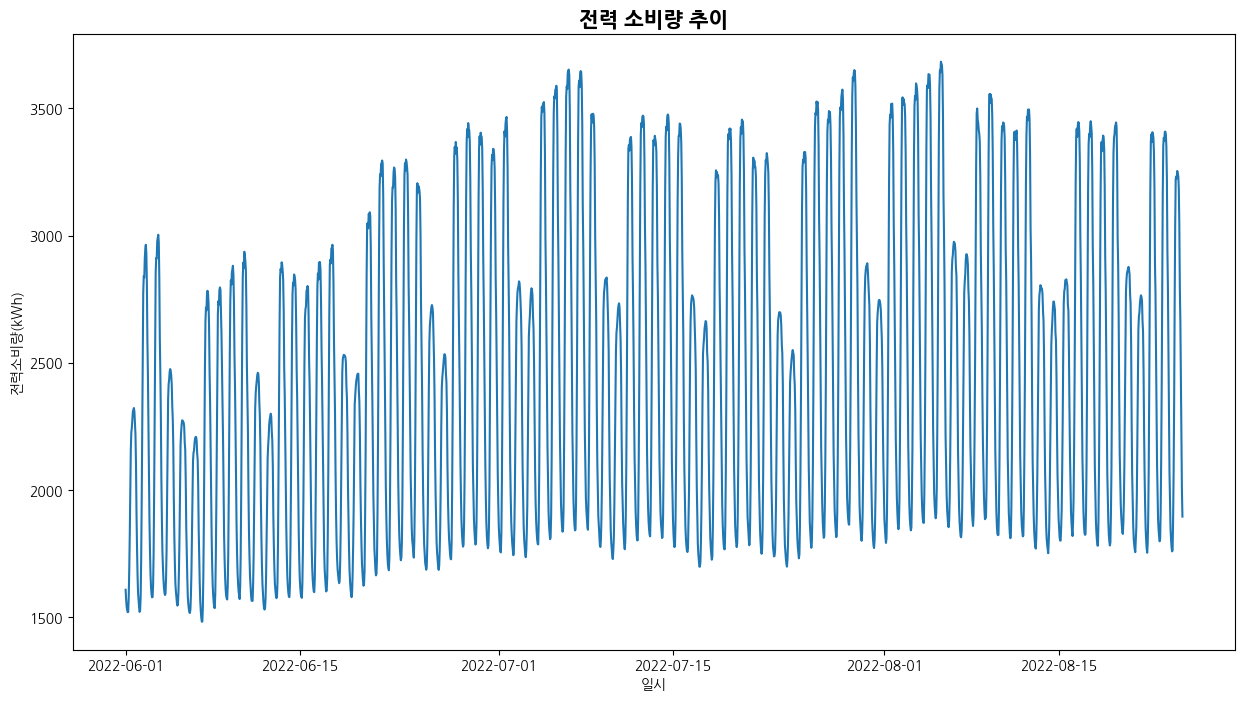

In [60]:
plt.figure(figsize=(15,8))
sns.lineplot(data=train_df, x='일시', y='전력소비량(kWh)', errorbar=None)
plt.title('전력 소비량 추이', fontsize=15, fontweight='bold')
plt.show()

- 전력소비량은 시간의 흐름에 따라 비슷한 패턴을 그리며 전체적으로 증가하고 있는 추세

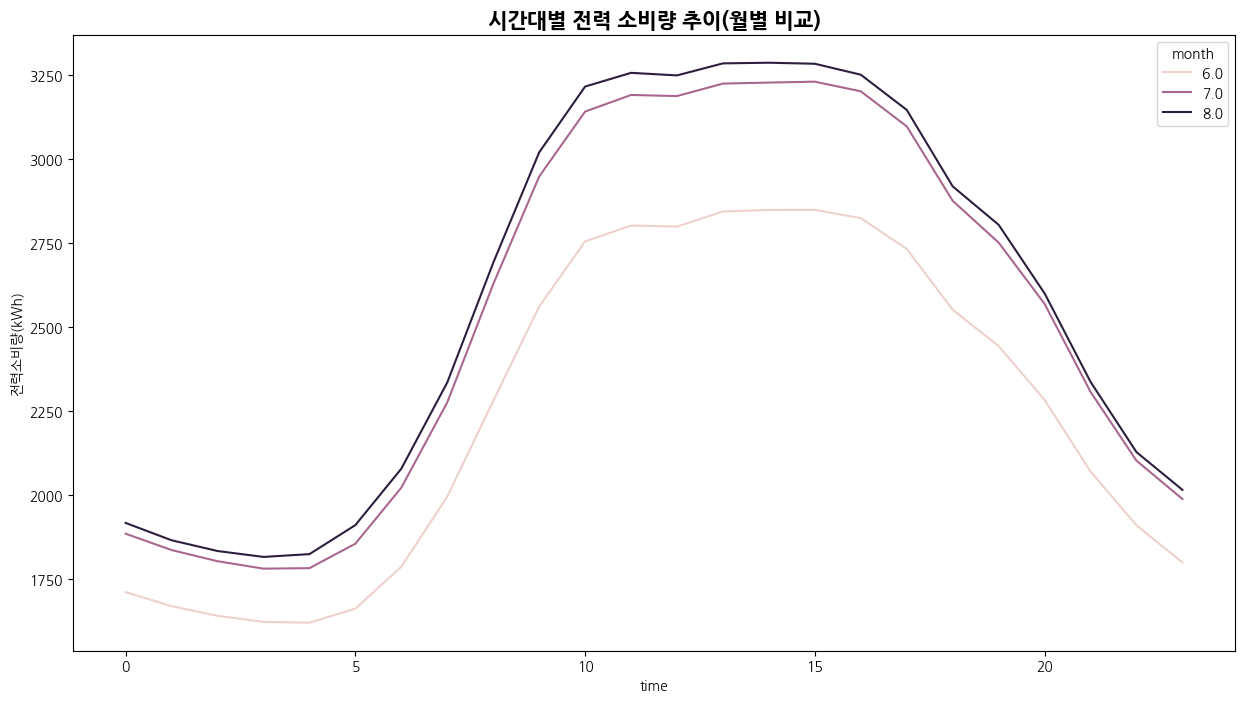

In [61]:
plt.figure(figsize=(15,8))
sns.lineplot(data=train_df, x='time', y='전력소비량(kWh)', hue='month', errorbar=None)
plt.title('시간대별 전력 소비량 추이(월별 비교)', fontsize=15, fontweight='bold')
plt.show()

- 8월, 7월, 6월 순으로 전력 소비량이 높으며 추세는 월과 상관없이 비슷함


- 낮 시간에 전력소비량이 가장 높으며 밤에 줄어드는 추세

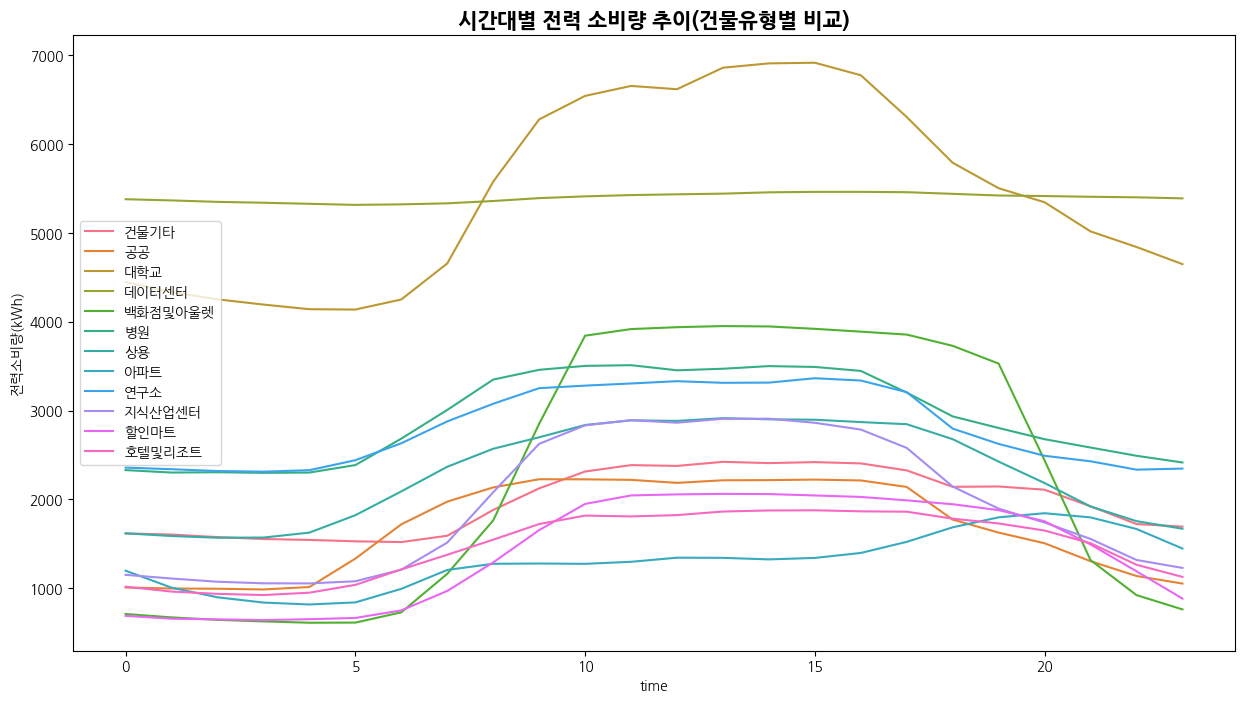

In [62]:
plt.figure(figsize=(15,8))
sns.lineplot(data=train_df, x='time', y='전력소비량(kWh)', hue='건물유형', errorbar=None)
plt.title('시간대별 전력 소비량 추이(건물유형별 비교)', fontsize=15, fontweight='bold')
plt.legend(loc='best')
plt.show()

- 대부분 낮 시간에 전력소비량이 증가하는 패턴이며 백화점 및 아울렛, 대학교의 경우 두드러짐


- 데이터센터의 경우 시간에 관계없이 일정 수준으로 유지됨(데이터센터 내 온, 습도를 일정하게 유지하기 위함으로 추측)

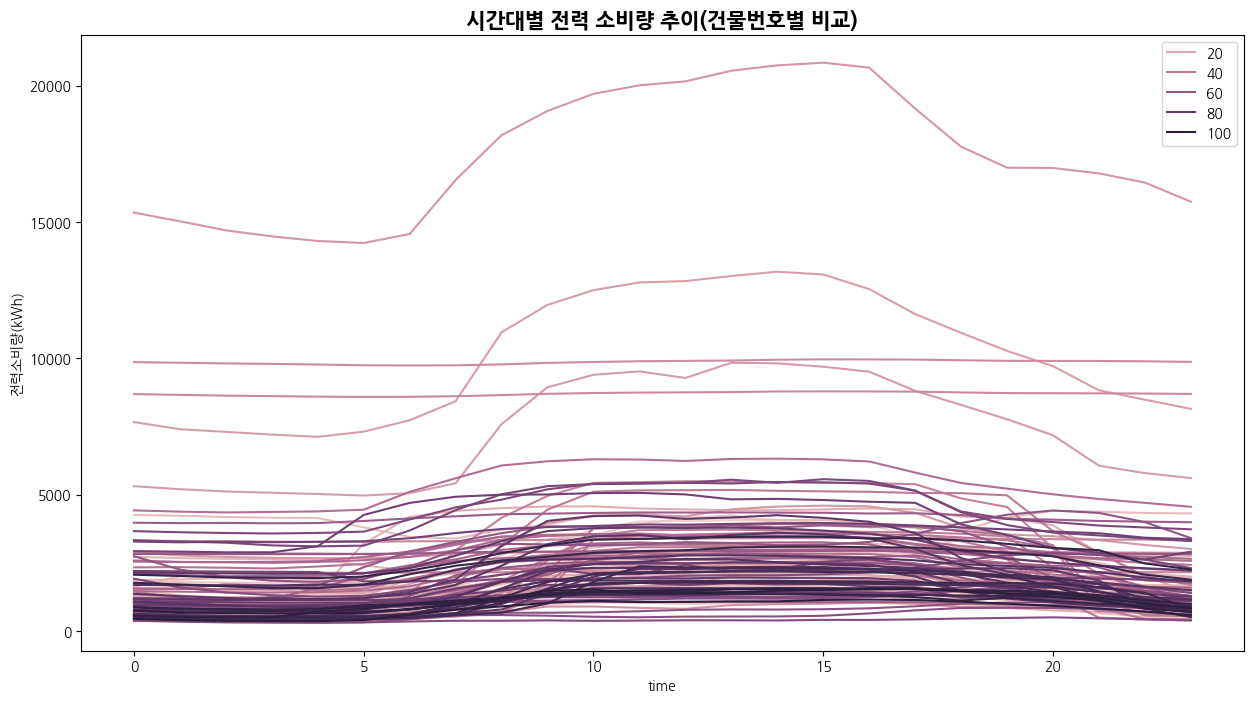

In [63]:
plt.figure(figsize=(15,8))
sns.lineplot(data=train_df, x='time', y='전력소비량(kWh)', hue='건물번호', errorbar=None)
plt.title('시간대별 전력 소비량 추이(건물번호별 비교)', fontsize=15, fontweight='bold')
plt.legend(loc='best')
plt.show()

- 대부분 비슷한 추이를 보이나 몇몇 건물의 경우 전력소비량이 상대적으로 높게 나타남

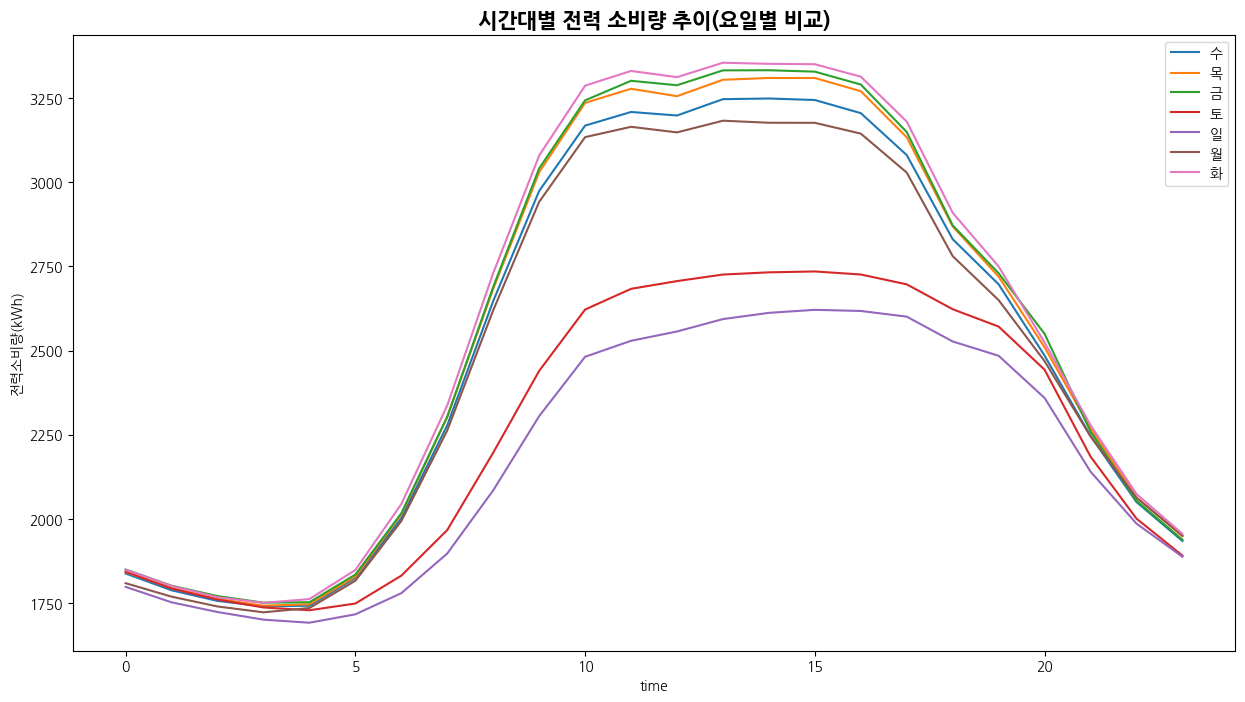

In [64]:
plt.figure(figsize=(15,8))
sns.lineplot(data=train_df, x='time', y='전력소비량(kWh)', hue='요일', errorbar=None)
plt.title('시간대별 전력 소비량 추이(요일별 비교)', fontsize=15, fontweight='bold')
plt.legend(loc='best')
plt.show()

- 평일일 경우 요일에 관계 없이 대부분 비슷한 수준 및 추이


- 평일에 비해 주말이 낮은 전력소비량을 보임

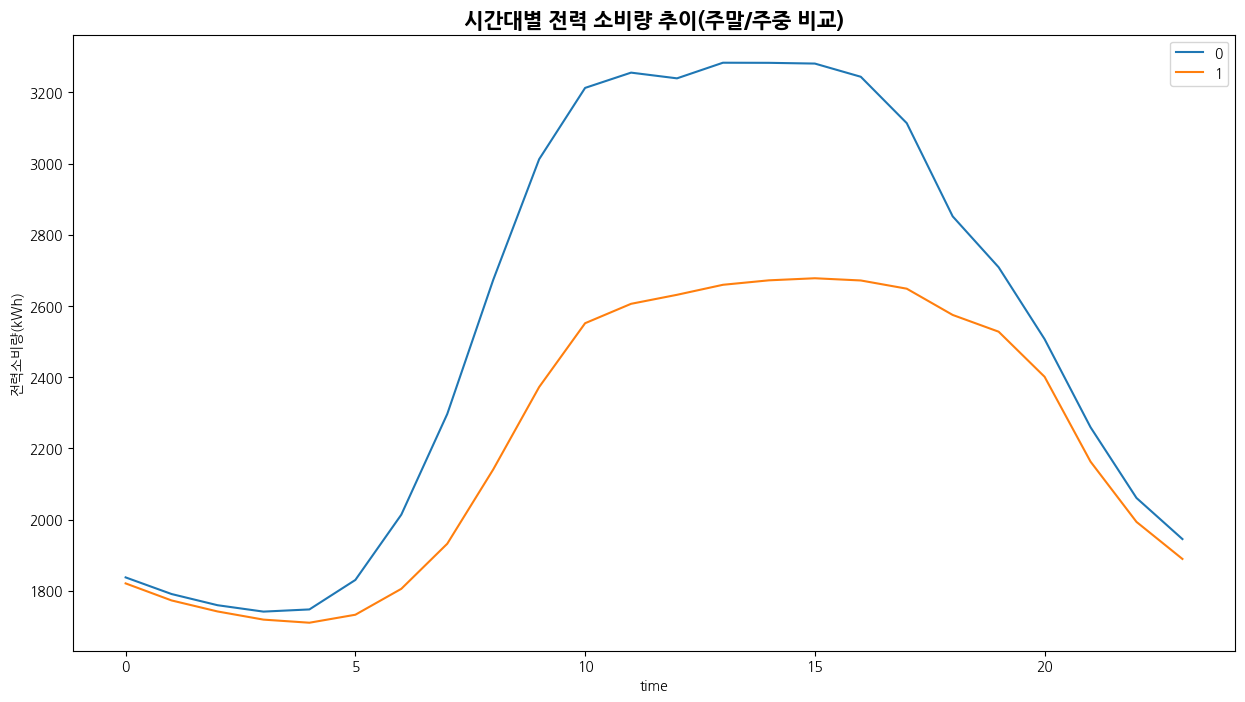

In [67]:
plt.figure(figsize=(15,8))
sns.lineplot(data=train_df, x='time', y='전력소비량(kWh)', hue='주말여부', errorbar=None)
plt.title('시간대별 전력 소비량 추이(주말/주중 비교)', fontsize=15, fontweight='bold')
plt.legend(loc='best')
plt.show()

- 평일에 비해 주말이 확연히 전력소비량이 낮은 것이 두드러짐

## 통계 분석

### 다중공선성 분석

In [71]:
# 독립변수 선택
X_indep = train_df.drop(columns=['num_date_time', '일시', '요일', '건물유형', '전력소비량(kWh)', '연면적(m2)', '냉방면적(m2)'])

In [72]:
# 변수들 간의 VIF 확인
vif_data = pd.DataFrame()
vif_data['Features'] = X_indep.columns
vif_data['VIF'] = [variance_inflation_factor(X_indep.values, i) for i in range(X_indep.shape[1])]
vif_data

,Features,VIF
0,건물번호,3.994113
1,기온(C),81.817534
2,강수량(mm),1.078693
3,풍속(m/s),3.875041
4,습도(%),38.320792
5,month,134.320560
6,day,4.657904
7,time,4.267481
8,주말여부,1.436208


- VIF 값이 5를 초과하는 몇몇 칼럼 존재

### 상관관계 분석

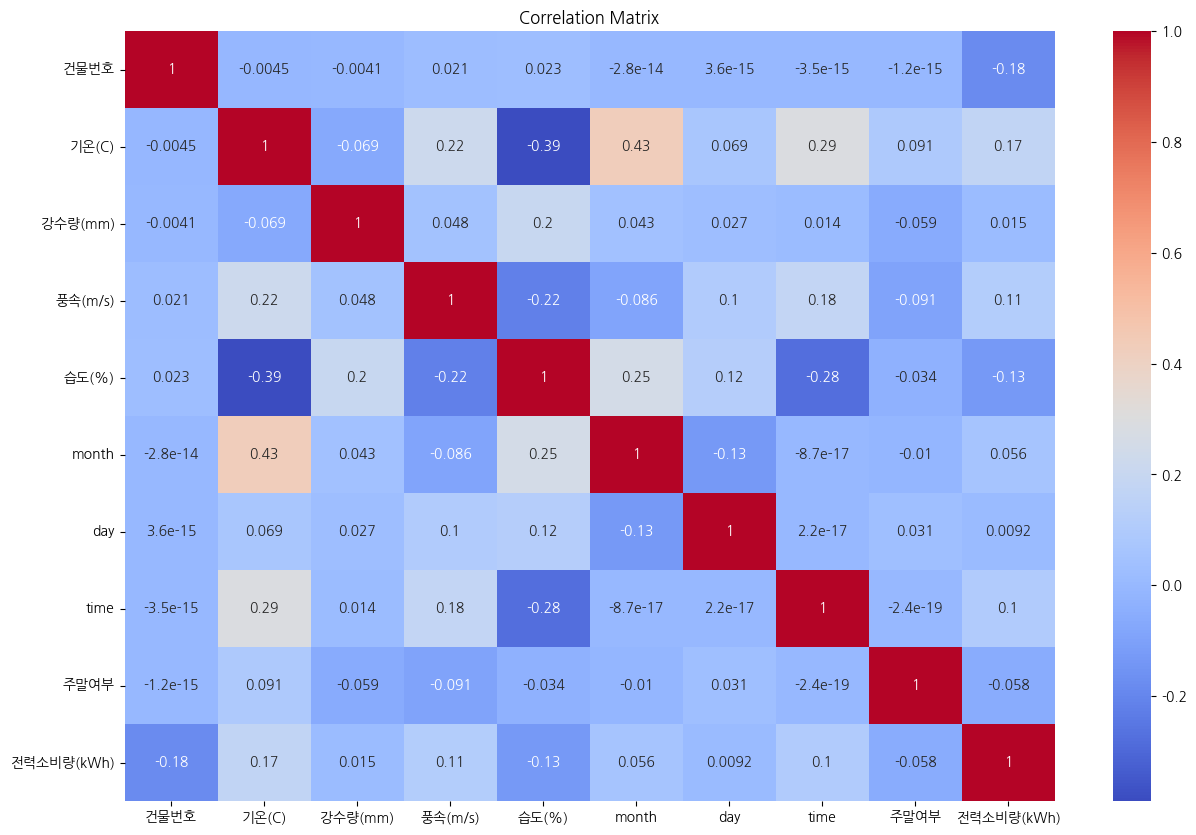

In [74]:
corr_mat = train_df.drop(columns=['num_date_time', '일시', '요일', '건물유형', '연면적(m2)', '냉방면적(m2)']).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Modeling

***<최종 독립변수>***


-> 건물번호, 기온(C), 강수량(mm), 풍속(m/s), 습도(%), month, day, time, 주말여부

***<건물번호 별로 모델링>***


- 건물번호 칼럼 1~100까지 Label 형태로 데이터가 존재하지만 사실상 범주형 변수


- One-hot encoding을 하기에도 케이스가 너무 많아짐


- 건물번호에 따라 모델링을 달리 하여 별도로 예측 수행 필요

In [75]:
# 최종 학습 데이터셋 구성
final_train_df = train_df[['건물번호', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', 'month', 'day', 'time', '주말여부', '전력소비량(kWh)']]

In [76]:
# 건물번호에 따라 모델을 생성 및 저장할 딕셔너리 생성
models_by_building_num = {}

# 건물번호별 모델 생성 및 저장
for building_num in final_train_df['건물번호'].unique():
    
    # 특정 건물번호의 데이터만 선택
    subset_data = final_train_df[final_train_df['건물번호'] == building_num]
    
    X = subset_data.drop(['전력소비량(kWh)'], axis=1)
    y = subset_data['전력소비량(kWh)']
    
    # 모델 생성
    model = RandomForestRegressor(random_state=42)
    model.fit(X,y)
    
    # 딕셔너리에 모델 저장
    models_by_building_num[building_num] = model
    
    # 예측 및 평가 수행
    y_pred = model.predict(X)
    rmse = mean_squared_error(y, y_pred, squared=False)
    print(f'Building {building_num} RMSE: {rmse}')

Building 1 RMSE: 76.78586245440503
Building 2 RMSE: 77.16725409121717
Building 3 RMSE: 97.28704173562797
Building 4 RMSE: 16.69134968715653
Building 5 RMSE: 271.3076678331047
Building 6 RMSE: 36.0849132663239
Building 7 RMSE: 25.626348849526874
Building 8 RMSE: 29.9132253240288
Building 9 RMSE: 40.94553193761915
Building 10 RMSE: 61.32073238970935
Building 11 RMSE: 32.933492224188825
Building 12 RMSE: 27.61224121470535
Building 13 RMSE: 53.63673790846754
Building 14 RMSE: 97.2011819726537
Building 15 RMSE: 33.53417597144231
Building 16 RMSE: 72.60830906827643
Building 17 RMSE: 33.89311023311009
Building 18 RMSE: 38.49494362640373
Building 19 RMSE: 39.78288749912947
Building 20 RMSE: 63.798353320324324
Building 21 RMSE: 57.3891553939272
Building 22 RMSE: 23.526935829253784
Building 23 RMSE: 13.293507072906973
Building 24 RMSE: 172.94391101517985
Building 25 RMSE: 161.36272583565403
Building 26 RMSE: 57.75613633569421
Building 27 RMSE: 177.88640875969014
Building 28 RMSE: 51.056553834038

# Forecasting

In [77]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16800 entries, 0 to 16799
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   num_date_time  16800 non-null  object        
 1   건물번호           16800 non-null  int64         
 2   일시             16800 non-null  datetime64[ns]
 3   기온(C)          16800 non-null  float64       
 4   강수량(mm)        16800 non-null  float64       
 5   풍속(m/s)        16800 non-null  float64       
 6   습도(%)          16800 non-null  float64       
 7   month          16800 non-null  float64       
 8   day            16800 non-null  float64       
 9   time           16800 non-null  float64       
 10  요일             16800 non-null  object        
 11  주말여부           16800 non-null  int64         
 12  건물유형           16800 non-null  object        
 13  연면적(m2)        16800 non-null  float64       
 14  냉방면적(m2)       16800 non-null  float64       
dtypes: datetime64[ns](1

In [78]:
# 테스트용 데이터 - 독립변수 추출
X_test = test_df[['건물번호', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', 'month', 'day', 'time', '주말여부']]

In [79]:
# 예측 수행
forecast_values = []

for building_num in X_test['건물번호'].unique():
    # 특정 건물번호의 데이터만 선택
    X_test_subset = X_test[X_test['건물번호'] == building_num]
    
    test_model = models_by_building_num[building_num]
    forecast_val = test_model.predict(X_test_subset)
    forecast_values.append(forecast_val)

In [80]:
forecast_values

[array([2032.872 , 2115.4176, 1998.504 , 1972.3776, 1978.4688, 2023.6272,
        2224.2624, 2563.3968, 2883.8448, 3235.5072, 4240.9056, 4292.9544,
        4298.4048, 4298.7408, 4302.6576, 4077.1152, 4000.7112, 3726.4464,
        2623.3248, 2401.9008, 2324.3376, 1950.792 , 1485.0528, 2034.3216,
        2234.1408, 2072.448 , 1943.6592, 1916.0976, 1791.4656, 2048.3616,
        2032.6512, 2594.0592, 2886.576 , 3247.5144, 4182.1392, 4376.16  ,
        4362.48  , 4408.6368, 4364.6856, 4204.26  , 4159.8528, 3834.9696,
        2614.9296, 2423.9088, 2411.5488, 1961.5584, 1480.6512, 2053.1616,
        1644.2976, 1658.4048, 1592.6928, 1546.632 , 1560.4896, 1480.2432,
        1813.5312, 1965.8352, 2053.992 , 2361.9168, 3398.136 , 3532.1328,
        3545.5584, 3538.0512, 3520.296 , 3511.296 , 3499.7472, 3483.6624,
        2501.5776, 2290.944 , 2237.0064, 1923.36  , 1441.2   , 1970.76  ,
        1667.5776, 1654.728 , 1539.1008, 1583.6592, 1585.6176, 1641.1968,
        1797.12  , 1933.6656, 2108.136

In [81]:
new_forecast_values = []
for values in forecast_values:
    for value in values:
        new_forecast_values.append(value)

In [82]:
len(new_forecast_values)

16800

In [83]:
new_forecast_values

[2032.8720000000003,
 2115.4176000000016,
 1998.503999999998,
 1972.377599999998,
 1978.4687999999978,
 2023.6271999999988,
 2224.2623999999996,
 2563.3968,
 2883.8447999999994,
 3235.507199999998,
 4240.905599999997,
 4292.954399999999,
 4298.404799999999,
 4298.7408000000005,
 4302.6576000000005,
 4077.1152,
 4000.711199999999,
 3726.446400000001,
 2623.3247999999994,
 2401.9008000000017,
 2324.3376000000003,
 1950.792,
 1485.0528000000004,
 2034.321599999999,
 2234.1408000000006,
 2072.4480000000003,
 1943.6591999999985,
 1916.097599999998,
 1791.4655999999989,
 2048.3615999999993,
 2032.6511999999984,
 2594.0592000000015,
 2886.575999999997,
 3247.5143999999987,
 4182.1392000000005,
 4376.159999999998,
 4362.479999999997,
 4408.636800000006,
 4364.685600000002,
 4204.26,
 4159.852799999997,
 3834.969600000001,
 2614.929599999999,
 2423.908799999999,
 2411.5487999999987,
 1961.5583999999994,
 1480.6512000000002,
 2053.1616,
 1644.2976000000012,
 1658.4048000000007,
 1592.69279999999

# Submission

In [84]:
sample_submission = train_df = pd.read_csv('./dataset/sample_submission.csv', encoding='utf-8')
sample_submission.head()

,num_date_time,answer
0,1_20220825 00,0
1,1_20220825 01,0
2,1_20220825 02,0
3,1_20220825 03,0
4,1_20220825 04,0


In [85]:
sample_submission['answer'] = new_forecast_values
sample_submission.head()

,num_date_time,answer
0,1_20220825 00,2032.8720
1,1_20220825 01,2115.4176
2,1_20220825 02,1998.5040
3,1_20220825 03,1972.3776
4,1_20220825 04,1978.4688


In [86]:
sample_submission.to_csv('./submission/RandomForest_4.csv', index=False)